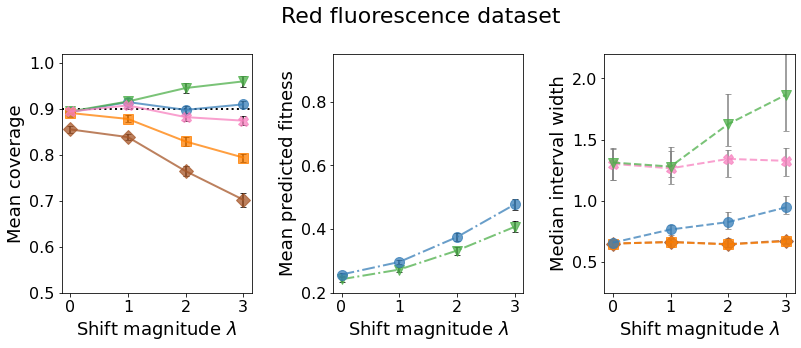

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

flur_color = 'red'
muh_name = 'NN'
ntrain = 192 ## 96, 192 ## 
l2 = 0.5
K_str = '48'
metric = 'coverage'
n_seed = 20
lmbdas = [0, 1, 2, 3]
capsize=3

IF_order = '3'

wid_q = 0.25
wid_e_color = 'gray'

CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

## Plotting params
markersize=10
linewidth=2
transparency=0.75
linestyle_wid='--'
linestyle_fit='-.'
axs_label_sizes=18
tick_sizes=16
suptitle_size=25

df_all     = pd.read_csv('2023-05-15_' + flur_color + '_NN_ntrain' + str(ntrain) + '_lmbda3_seed20_' + str(l2) + 'L2_PIs_results_IFs_ALL.csv')
df_by_seed = pd.read_csv('2023-05-15_' + flur_color + '_NN_ntrain' + str(ntrain) + '_lmbda3_seed20_' + str(l2) + 'L2_PIs_results_BySeed_IFs.csv')

results = pd.DataFrame({'cov_0' : df_by_seed[0:220].groupby('method').mean()['coverage'], \
            'cov_1' : df_by_seed[220:440].groupby('method').mean()['coverage'], \
            'cov_2' : df_by_seed[440:660].groupby('method').mean()['coverage'], \
            'cov_3' : df_by_seed[660:880].groupby('method').mean()['coverage'], \
            'wid_0' : df_all[0:43781].groupby('method').median()['width'], \
            'wid_1' : df_all[43781:87561].groupby('method').median()['width'], \
            'wid_2' : df_all[87561:131341].groupby('method').median()['width'], \
            'wid_3' : df_all[131341:175121].groupby('method').median()['width'], \
            'muh_test_0' : df_by_seed[0:220].groupby('method').mean()['muh_test'], \
            'muh_test_1' : df_by_seed[220:440].groupby('method').mean()['muh_test'], \
            'muh_test_2' : df_by_seed[440:660].groupby('method').mean()['muh_test'], \
            'muh_test_3' : df_by_seed[660:880].groupby('method').mean()['muh_test']})

errorbars = pd.DataFrame({'cov_stder_0' : df_by_seed[0:220].groupby('method').std()['coverage'] / np.sqrt(n_seed), \
            'cov_stder_1' : df_by_seed[220:440].groupby('method').std()['coverage'] / np.sqrt(n_seed), \
            'cov_stder_2' : df_by_seed[440:660].groupby('method').std()['coverage'] / np.sqrt(n_seed), \
            'cov_stder_3' : df_by_seed[660:880].groupby('method').std()['coverage'] / np.sqrt(n_seed), \
            'wid_lq_0' : np.abs(results['wid_0'] - df_all[0:43781].groupby('method')['width'].quantile(wid_q)), \
            'wid_lq_1' : np.abs(results['wid_1'] - df_all[43781:87561].groupby('method')['width'].quantile(wid_q)), \
            'wid_lq_2' : np.abs(results['wid_2'] - df_all[87561:131341].groupby('method')['width'].quantile(wid_q)), \
            'wid_lq_3' : np.abs(results['wid_3'] - df_all[131341:175121].groupby('method')['width'].quantile(wid_q)), \
            'wid_uq_0' : np.abs(results['wid_0'] - df_all[0:43781].groupby('method')['width'].quantile(1-wid_q)), \
            'wid_uq_1' : np.abs(results['wid_1'] - df_all[43781:87561].groupby('method')['width'].quantile(1-wid_q)), \
            'wid_uq_2' : np.abs(results['wid_2'] - df_all[87561:131341].groupby('method')['width'].quantile(1-wid_q)), \
            'wid_uq_3' : np.abs(results['wid_3'] - df_all[131341:175121].groupby('method')['width'].quantile(1-wid_q)), \
            'muh_test_stder_0' : df_by_seed[0:220].groupby('method').std()['muh_test'] / np.sqrt(n_seed), \
            'muh_test_stder_1' : df_by_seed[220:440].groupby('method').std()['muh_test'] / np.sqrt(n_seed), \
            'muh_test_stder_2' : df_by_seed[440:660].groupby('method').std()['muh_test'] / np.sqrt(n_seed), \
            'muh_test_stder_3' : df_by_seed[660:880].groupby('method').std()['muh_test'] / np.sqrt(n_seed)})


def get_errorbars(metric, method, errorbars):
    if (metric == 'coverage'):
        return errorbars.loc[method, ['cov_stder_' + str(i) for i in range(0, 4)]]
    
    if (metric == 'muh_test'):
        return errorbars.loc[method, ['muh_test_stder_' + str(i) for i in range(0, 4)]]
    
    if (metric == 'width'):
        return np.vstack((errorbars.loc[method, ['wid_lq_' + str(i) for i in range(0, 4)]], errorbars.loc[method, ['wid_uq_' + str(i) for i in range(0, 4)]]))

    
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 5))
f.tight_layout(pad=5.0)
f.suptitle('Red fluorescence dataset', fontsize=22)

# ax1.set_title('Mean coverage', fontsize=axs_label_sizes)
# ax2.set_title('Mean predicted fitness', fontsize=axs_label_sizes)
# ax3.set_title('Median interval width', fontsize=axs_label_sizes)


ax1.errorbar(lmbdas, results.loc['IF'+IF_order+'-JAWA', ['cov_' + str(i) for i in range(0, 4)]], marker='o', yerr = get_errorbars('coverage', 'IF'+IF_order+'-JAWA', errorbars), ecolor = 'black', label = 'IF'+IF_order+'-JAWA-FCS', linewidth=linewidth, alpha =transparency, markersize=markersize, color=CB_color_cycle[0], capsize=capsize)
ax1.errorbar(lmbdas, results.loc['weighted_split', ['cov_' + str(i) for i in range(0, 4)]], marker='v', yerr = get_errorbars('coverage', 'weighted_split', errorbars), ecolor = 'black', label = 'weighted split', linewidth=linewidth, alpha =transparency, markersize=markersize, color=CB_color_cycle[2], capsize=capsize)
ax1.errorbar(lmbdas, results.loc['IF'+IF_order+'-jackknife+', ['cov_' + str(i) for i in range(0, 4)]], marker='s', yerr = get_errorbars('coverage', 'IF'+IF_order+'-jackknife+', errorbars), ecolor = 'black', label = 'IF'+IF_order+'-jackknife+', linewidth=linewidth, alpha =transparency, markersize=markersize, color=CB_color_cycle[1], capsize=capsize)
ax1.errorbar(lmbdas, results.loc['split', ['cov_' + str(i) for i in range(0, 4)]], marker='X', yerr = get_errorbars('coverage', 'split', errorbars), ecolor = 'black', label = 'split', linewidth=linewidth, alpha =transparency, markersize=markersize, color=CB_color_cycle[3], capsize=capsize)
ax1.errorbar(lmbdas, results.loc['IF'+IF_order+'-jackknife', ['cov_' + str(i) for i in range(0, 4)]], marker='D', yerr = get_errorbars('coverage', 'IF'+IF_order+'-jackknife', errorbars), ecolor = 'black', label = 'IF'+IF_order+'-jackknife', linewidth=linewidth, alpha =transparency, markersize=markersize, color=CB_color_cycle[4], capsize=capsize)

# ax1.errorbar(lmbdas, results.loc['IF2-JAWA', ['cov_' + str(i) for i in range(0, 4)]], marker='.', yerr = get_errorbars('coverage', 'IF2-JAWA', errorbars), ecolor = 'black', label = 'IF2-JAWA', linewidth=linewidth, alpha =transparency, markersize=markersize, linestyle='--',color=CB_color_cycle[0], capsize=capsize)
# ax1.errorbar(lmbdas, results.loc['IF1-JAWA', ['cov_' + str(i) for i in range(0, 4)]], marker='.', yerr = get_errorbars('coverage', 'IF1-JAWA', errorbars), ecolor = 'black', label = 'IF1-JAWA', linewidth=linewidth, alpha =transparency, markersize=markersize, linestyle=':', color=CB_color_cycle[0], capsize=capsize)

ax1.set_ylabel('Mean coverage', fontsize=axs_label_sizes)
ax1.set_xlabel('Shift magnitude $\lambda$', fontsize=axs_label_sizes)
ax1.set_xticks(lmbdas)
ax1.set_ylim([0.5,1.02])
ax1.axhline(y = 0.9, linestyle = ':', color = 'black', linewidth=2)
ax1.tick_params(axis='both', labelsize=tick_sizes)


ax2.errorbar(lmbdas, results.loc['weighted_split', ['muh_test_' + str(i) for i in range(0, 4)]], marker='v', yerr = get_errorbars('muh_test', 'weighted_split', errorbars), ecolor = 'black', label = 'weighted split', linewidth=linewidth, alpha =transparency, markersize=markersize,linestyle=linestyle_fit, color=CB_color_cycle[2], capsize=capsize)
ax2.errorbar(lmbdas, results.loc['IF'+IF_order+'-JAWA', ['muh_test_' + str(i) for i in range(0, 4)]], marker='o', yerr = get_errorbars('muh_test', 'IF'+IF_order+'-JAWA', errorbars), ecolor = 'black', label = 'IF'+IF_order+'-JAWA', linewidth=linewidth, alpha =transparency, markersize=markersize, linestyle=linestyle_fit, color=CB_color_cycle[0], capsize=capsize)

ax2.set_ylabel('Mean predicted fitness', fontsize=axs_label_sizes)
ax2.set_xlabel('Shift magnitude $\lambda$', fontsize=axs_label_sizes)
ax2.tick_params(axis='both', labelsize=tick_sizes)
ax2.set_xticks(lmbdas)
ax2.set_ylim([0.2,0.95])



# ax1.legend(loc=[0,1.1],ncol=3,fontsize=20)


ax3.errorbar(lmbdas, results.loc['split', ['wid_' + str(i) for i in range(0, 4)]], marker='X', yerr = get_errorbars('width', 'split', errorbars), ecolor = wid_e_color, label = 'split', linewidth=linewidth, alpha =transparency, markersize=markersize,linestyle=linestyle_wid, color=CB_color_cycle[3], capsize=capsize)
ax3.errorbar(lmbdas, results.loc['weighted_split', ['wid_' + str(i) for i in range(0, 4)]], marker='v', yerr = get_errorbars('width', 'weighted_split', errorbars), ecolor = wid_e_color, label = 'weighted split', linewidth=linewidth, alpha =transparency, markersize=markersize,linestyle=linestyle_wid, color=CB_color_cycle[2], capsize=capsize)
ax3.errorbar(lmbdas, results.loc['IF'+IF_order+'-jackknife', ['wid_' + str(i) for i in range(0, 4)]], marker='D', yerr = get_errorbars('width', 'IF'+IF_order+'-jackknife', errorbars), ecolor = wid_e_color, label = 'IF'+IF_order+'-jackknife', linewidth=linewidth, alpha =transparency, markersize=markersize,linestyle=linestyle_wid, color=CB_color_cycle[4], capsize=capsize)
ax3.errorbar(lmbdas, results.loc['IF'+IF_order+'-jackknife+', ['wid_' + str(i) for i in range(0, 4)]], marker='s', yerr = get_errorbars('width', 'IF'+IF_order+'-jackknife+', errorbars), ecolor = wid_e_color, label = 'IF'+IF_order+'-jackknife+', linewidth=linewidth, alpha =transparency, markersize=markersize,linestyle=linestyle_wid, color=CB_color_cycle[1], capsize=capsize)
ax3.errorbar(lmbdas, results.loc['IF'+IF_order+'-JAWA', ['wid_' + str(i) for i in range(0, 4)]], marker='o', yerr = get_errorbars('width', 'IF'+IF_order+'-JAWA', errorbars), ecolor = wid_e_color, label = 'IF'+IF_order+'-JAWA', linewidth=linewidth, alpha =transparency, markersize=markersize,linestyle=linestyle_wid, color=CB_color_cycle[0], capsize=capsize)



ax3.set_ylabel('Median interval width', fontsize=axs_label_sizes)
ax3.set_xlabel('Shift magnitude $\lambda$', fontsize=axs_label_sizes)
ax3.set_xticks(lmbdas, fontsize=14)
ax3.set_ylim([0.25,2.2])
ax3.tick_params(axis='both', labelsize=tick_sizes)

plt.savefig('fig_red_IFs.png', dpi=200)



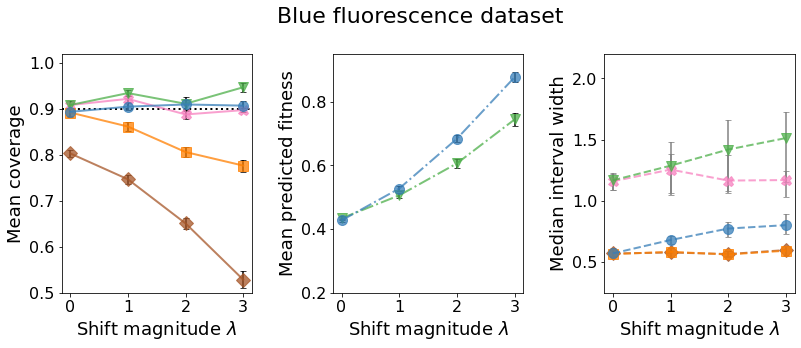

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

flur_color = 'blue'
muh_name = 'NN'
ntrain = 192 ## 96, 192 ## 
l2 = 0.5
K_str = '48'
metric = 'coverage'
n_seed = 20
lmbdas = [0, 1, 2, 3]
capsize=3

IF_order = '3'

wid_q = 0.25
wid_e_color = 'gray'

CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

## Plotting params
markersize=10
linewidth=2
transparency=0.75
linestyle_wid='--'
linestyle_fit='-.'
axs_label_sizes=18
tick_sizes=16
suptitle_size=25

df_all     = pd.read_csv('2023-05-15_' + flur_color + '_NN_ntrain' + str(ntrain) + '_lmbda3_seed20_' + str(l2) + 'L2_PIs_results_IFs_ALL.csv')
df_by_seed = pd.read_csv('2023-05-15_' + flur_color + '_NN_ntrain' + str(ntrain) + '_lmbda3_seed20_' + str(l2) + 'L2_PIs_results_BySeed_IFs.csv')

results = pd.DataFrame({'cov_0' : df_by_seed[0:220].groupby('method').mean()['coverage'], \
            'cov_1' : df_by_seed[220:440].groupby('method').mean()['coverage'], \
            'cov_2' : df_by_seed[440:660].groupby('method').mean()['coverage'], \
            'cov_3' : df_by_seed[660:880].groupby('method').mean()['coverage'], \
            'wid_0' : df_all[0:43781].groupby('method').median()['width'], \
            'wid_1' : df_all[43781:87561].groupby('method').median()['width'], \
            'wid_2' : df_all[87561:131341].groupby('method').median()['width'], \
            'wid_3' : df_all[131341:175121].groupby('method').median()['width'], \
            'muh_test_0' : df_by_seed[0:220].groupby('method').mean()['muh_test'], \
            'muh_test_1' : df_by_seed[220:440].groupby('method').mean()['muh_test'], \
            'muh_test_2' : df_by_seed[440:660].groupby('method').mean()['muh_test'], \
            'muh_test_3' : df_by_seed[660:880].groupby('method').mean()['muh_test']})

errorbars = pd.DataFrame({'cov_stder_0' : df_by_seed[0:220].groupby('method').std()['coverage'] / np.sqrt(n_seed), \
            'cov_stder_1' : df_by_seed[220:440].groupby('method').std()['coverage'] / np.sqrt(n_seed), \
            'cov_stder_2' : df_by_seed[440:660].groupby('method').std()['coverage'] / np.sqrt(n_seed), \
            'cov_stder_3' : df_by_seed[660:880].groupby('method').std()['coverage'] / np.sqrt(n_seed), \
            'wid_lq_0' : np.abs(results['wid_0'] - df_all[0:43781].groupby('method')['width'].quantile(wid_q)), \
            'wid_lq_1' : np.abs(results['wid_1'] - df_all[43781:87561].groupby('method')['width'].quantile(wid_q)), \
            'wid_lq_2' : np.abs(results['wid_2'] - df_all[87561:131341].groupby('method')['width'].quantile(wid_q)), \
            'wid_lq_3' : np.abs(results['wid_3'] - df_all[131341:175121].groupby('method')['width'].quantile(wid_q)), \
            'wid_uq_0' : np.abs(results['wid_0'] - df_all[0:43781].groupby('method')['width'].quantile(1-wid_q)), \
            'wid_uq_1' : np.abs(results['wid_1'] - df_all[43781:87561].groupby('method')['width'].quantile(1-wid_q)), \
            'wid_uq_2' : np.abs(results['wid_2'] - df_all[87561:131341].groupby('method')['width'].quantile(1-wid_q)), \
            'wid_uq_3' : np.abs(results['wid_3'] - df_all[131341:175121].groupby('method')['width'].quantile(1-wid_q)), \
            'muh_test_stder_0' : df_by_seed[0:220].groupby('method').std()['muh_test'] / np.sqrt(n_seed), \
            'muh_test_stder_1' : df_by_seed[220:440].groupby('method').std()['muh_test'] / np.sqrt(n_seed), \
            'muh_test_stder_2' : df_by_seed[440:660].groupby('method').std()['muh_test'] / np.sqrt(n_seed), \
            'muh_test_stder_3' : df_by_seed[660:880].groupby('method').std()['muh_test'] / np.sqrt(n_seed)})


def get_errorbars(metric, method, errorbars):
    if (metric == 'coverage'):
        return errorbars.loc[method, ['cov_stder_' + str(i) for i in range(0, 4)]]
    
    if (metric == 'muh_test'):
        return errorbars.loc[method, ['muh_test_stder_' + str(i) for i in range(0, 4)]]
    
    if (metric == 'width'):
        return np.vstack((errorbars.loc[method, ['wid_lq_' + str(i) for i in range(0, 4)]], errorbars.loc[method, ['wid_uq_' + str(i) for i in range(0, 4)]]))

    
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 5))
f.tight_layout(pad=5.0)
f.suptitle('Blue fluorescence dataset', fontsize=22)

    
ax1.errorbar(lmbdas, results.loc['split', ['cov_' + str(i) for i in range(0, 4)]], marker='X', yerr = get_errorbars('coverage', 'split', errorbars), ecolor = 'black', label = 'split', linewidth=linewidth, alpha =transparency, markersize=markersize, color=CB_color_cycle[3], capsize=capsize)
ax1.errorbar(lmbdas, results.loc['weighted_split', ['cov_' + str(i) for i in range(0, 4)]], marker='v', yerr = get_errorbars('coverage', 'weighted_split', errorbars), ecolor = 'black', label = 'weighted split', linewidth=linewidth, alpha =transparency, markersize=markersize, color=CB_color_cycle[2], capsize=capsize)
ax1.errorbar(lmbdas, results.loc['IF'+IF_order+'-jackknife', ['cov_' + str(i) for i in range(0, 4)]], marker='D', yerr = get_errorbars('coverage', 'IF'+IF_order+'-jackknife', errorbars), ecolor = 'black', label = 'IF'+IF_order+'-jackknife', linewidth=linewidth, alpha =transparency, markersize=markersize, color=CB_color_cycle[4], capsize=capsize)
ax1.errorbar(lmbdas, results.loc['IF'+IF_order+'-jackknife+', ['cov_' + str(i) for i in range(0, 4)]], marker='s', yerr = get_errorbars('coverage', 'IF'+IF_order+'-jackknife+', errorbars), ecolor = 'black', label = 'IF'+IF_order+'-jackknife+', linewidth=linewidth, alpha =transparency, markersize=markersize, color=CB_color_cycle[1], capsize=capsize)
ax1.errorbar(lmbdas, results.loc['IF'+IF_order+'-JAWA', ['cov_' + str(i) for i in range(0, 4)]], marker='o', yerr = get_errorbars('coverage', 'IF'+IF_order+'-JAWA', errorbars), ecolor = 'black', label = 'IF'+IF_order+'-JAWA', linewidth=linewidth, alpha =transparency, markersize=markersize, color=CB_color_cycle[0], capsize=capsize)
# ax1.errorbar(lmbdas, results.loc['IF2-JAWA', ['cov_' + str(i) for i in range(0, 4)]], marker='.', yerr = get_errorbars('coverage', 'IF2-JAWA', errorbars), ecolor = 'black', label = 'IF2-JAWA', linewidth=linewidth, alpha =transparency, markersize=markersize, linestyle='--',color=CB_color_cycle[0], capsize=capsize)
# ax1.errorbar(lmbdas, results.loc['IF1-JAWA', ['cov_' + str(i) for i in range(0, 4)]], marker='.', yerr = get_errorbars('coverage', 'IF1-JAWA', errorbars), ecolor = 'black', label = 'IF1-JAWA', linewidth=linewidth, alpha =transparency, markersize=markersize, linestyle=':', color=CB_color_cycle[0], capsize=capsize)


ax1.set_ylabel('Mean coverage', fontsize=axs_label_sizes)
ax1.set_xlabel('Shift magnitude $\lambda$', fontsize=axs_label_sizes)
ax1.set_xticks(lmbdas)
ax1.set_ylim([0.5,1.02])
ax1.axhline(y = 0.9, linestyle = ':', color = 'black', linewidth=2)
ax1.tick_params(axis='both', labelsize=tick_sizes)


ax2.errorbar(lmbdas, results.loc['weighted_split', ['muh_test_' + str(i) for i in range(0, 4)]], marker='v', yerr = get_errorbars('muh_test', 'weighted_split', errorbars), ecolor = 'black', label = 'weighted split', linewidth=linewidth, alpha =transparency, markersize=markersize,linestyle=linestyle_fit, color=CB_color_cycle[2], capsize=capsize)
ax2.errorbar(lmbdas, results.loc['IF'+IF_order+'-JAWA', ['muh_test_' + str(i) for i in range(0, 4)]], marker='o', yerr = get_errorbars('muh_test', 'IF'+IF_order+'-JAWA', errorbars), ecolor = 'black', label = 'IF'+IF_order+'-JAWA', linewidth=linewidth, alpha =transparency, markersize=markersize, linestyle=linestyle_fit, color=CB_color_cycle[0], capsize=capsize)

ax2.set_ylabel('Mean predicted fitness', fontsize=axs_label_sizes)
ax2.set_xlabel('Shift magnitude $\lambda$', fontsize=axs_label_sizes)
ax2.tick_params(axis='both', labelsize=tick_sizes)
ax2.set_xticks(lmbdas)
ax2.set_ylim([0.2,0.95])



# ax1.legend(loc=[0,1.1],ncol=2,fontsize=20)


ax3.errorbar(lmbdas, results.loc['split', ['wid_' + str(i) for i in range(0, 4)]], marker='X', yerr = get_errorbars('width', 'split', errorbars), ecolor = wid_e_color, label = 'split', linewidth=linewidth, alpha =transparency, markersize=markersize,linestyle=linestyle_wid, color=CB_color_cycle[3], capsize=capsize)
ax3.errorbar(lmbdas, results.loc['weighted_split', ['wid_' + str(i) for i in range(0, 4)]], marker='v', yerr = get_errorbars('width', 'weighted_split', errorbars), ecolor = wid_e_color, label = 'weighted split', linewidth=linewidth, alpha =transparency, markersize=markersize,linestyle=linestyle_wid, color=CB_color_cycle[2], capsize=capsize)
ax3.errorbar(lmbdas, results.loc['IF'+IF_order+'-jackknife', ['wid_' + str(i) for i in range(0, 4)]], marker='D', yerr = get_errorbars('width', 'IF'+IF_order+'-jackknife', errorbars), ecolor = wid_e_color, label = 'IF'+IF_order+'-jackknife', linewidth=linewidth, alpha =transparency, markersize=markersize,linestyle=linestyle_wid, color=CB_color_cycle[4], capsize=capsize)
ax3.errorbar(lmbdas, results.loc['IF'+IF_order+'-jackknife+', ['wid_' + str(i) for i in range(0, 4)]], marker='s', yerr = get_errorbars('width', 'IF'+IF_order+'-jackknife+', errorbars), ecolor = wid_e_color, label = 'IF'+IF_order+'-jackknife+', linewidth=linewidth, alpha =transparency, markersize=markersize,linestyle=linestyle_wid, color=CB_color_cycle[1], capsize=capsize)
ax3.errorbar(lmbdas, results.loc['IF'+IF_order+'-JAWA', ['wid_' + str(i) for i in range(0, 4)]], marker='o', yerr = get_errorbars('width', 'IF'+IF_order+'-JAWA', errorbars), ecolor = wid_e_color, label = 'IF'+IF_order+'-JAWA', linewidth=linewidth, alpha =transparency, markersize=markersize,linestyle=linestyle_wid, color=CB_color_cycle[0], capsize=capsize)



ax3.set_ylabel('Median interval width', fontsize=axs_label_sizes)
ax3.set_xlabel('Shift magnitude $\lambda$', fontsize=axs_label_sizes)
ax3.set_xticks(lmbdas, fontsize=14)
ax3.set_ylim([0.25,2.2])
ax3.tick_params(axis='both', labelsize=tick_sizes)

plt.savefig('fig_blue_IFs.png', dpi=200)


